In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importig dataset
df = pd.read_csv('winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# checking whether the data is balanced or not
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
# checking if there are any null values present in the data
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Exploratory Data Analysis


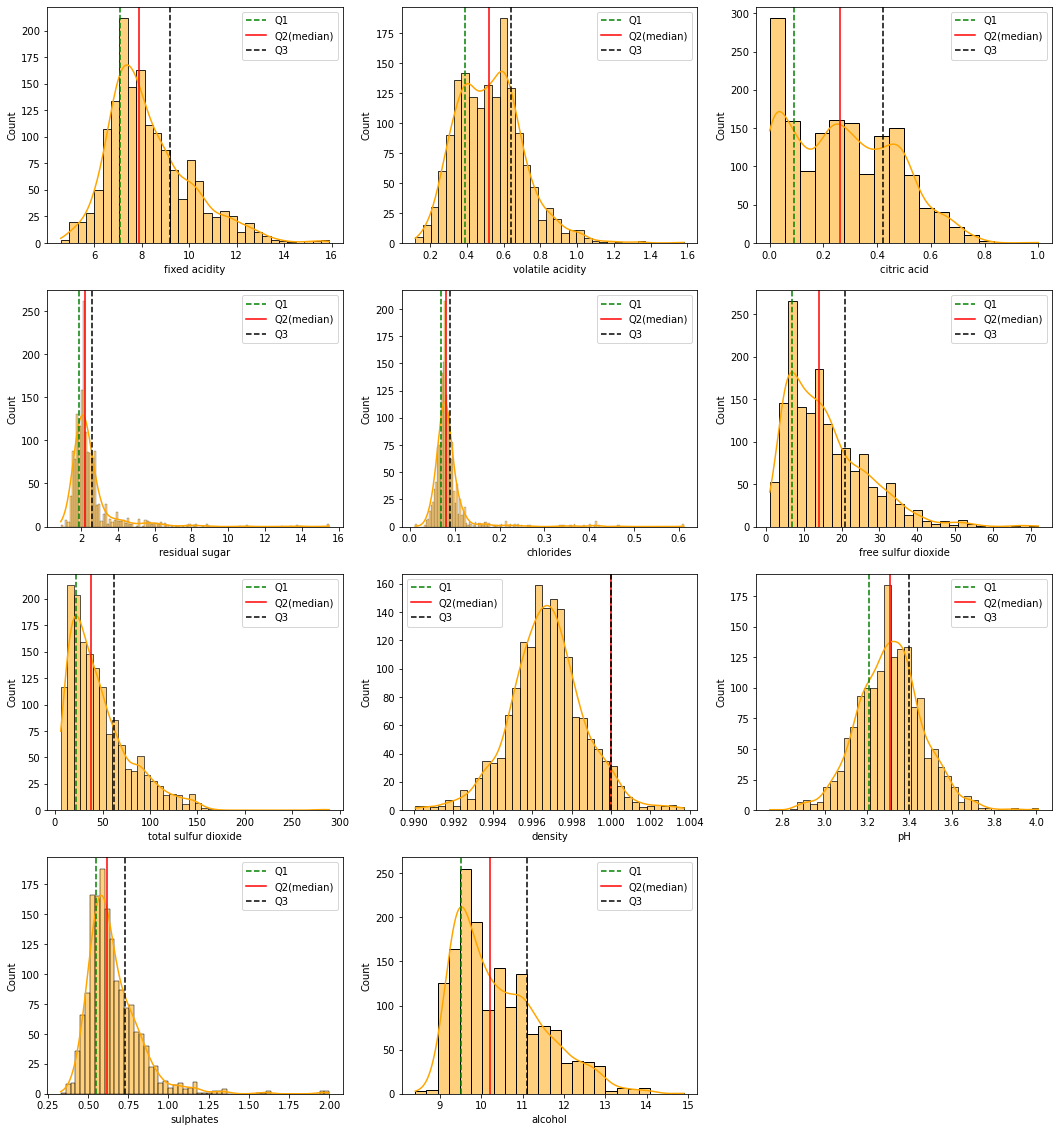

In [9]:
# let's check distribution of the data
features_ = df.columns[:-1]

def get_percentile(feature,q_range):
    dist = df[feature].describe()[str(q_range) + '%']
    return round(dist,2)
def render_counterplot():
    fig = plt.figure(figsize=(18,20))
    for column, feature in enumerate(features_):
        fig.add_subplot(4,3, column +1)
        q1 = get_percentile(feature,25)
        q2 = get_percentile(feature,50)
        q3 = get_percentile(feature,75)
        sns.histplot(data = df, x = feature, kde=True, color='orange')
        plt.axvline(q1, linestyle ='--', color='green',label='Q1')
        plt.axvline(q2,color='red',label='Q2(median)')
        plt.axvline(q3,linestyle='--',color='black',label='Q3')
        plt.legend()
render_counterplot()

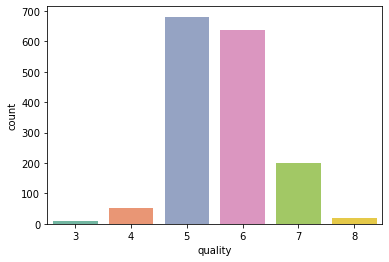

In [10]:
# We can clearly look at countplot and can tell that data is imbalanced
sns.countplot(x='quality',data=df,palette='Set2')

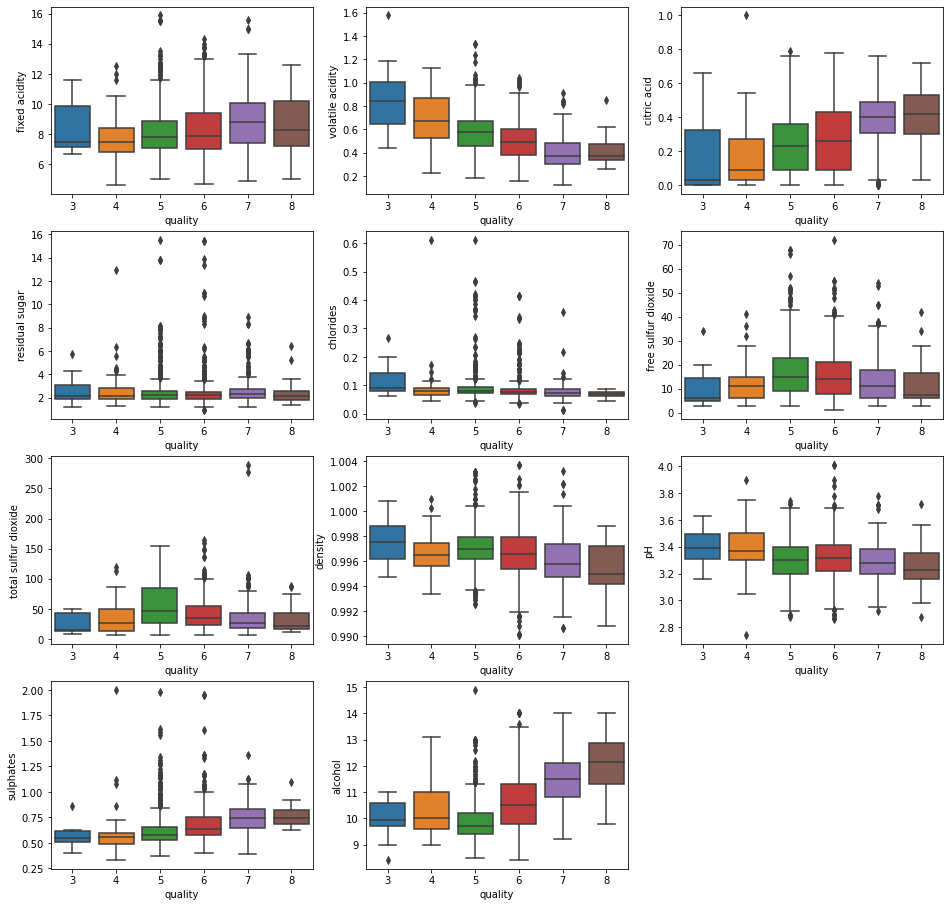

In [11]:
# Outlier check using a box plot
features_ = df.columns[:-1]
fig = plt.figure(figsize=(16,20))
for column, feature in enumerate(features_):
    fig.add_subplot(5,3, column+1)
    sns.boxplot(data=df, x='quality',y =feature)

In [12]:
# Split features and target
x = df.drop('quality',axis= 1)
y = df['quality']

In [13]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


In [15]:
# Importing StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

In [16]:
# Scaling down the data
scaler = StandardScaler()
x[x.columns] = scaler.fit_transform(x[x.columns])

In [17]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


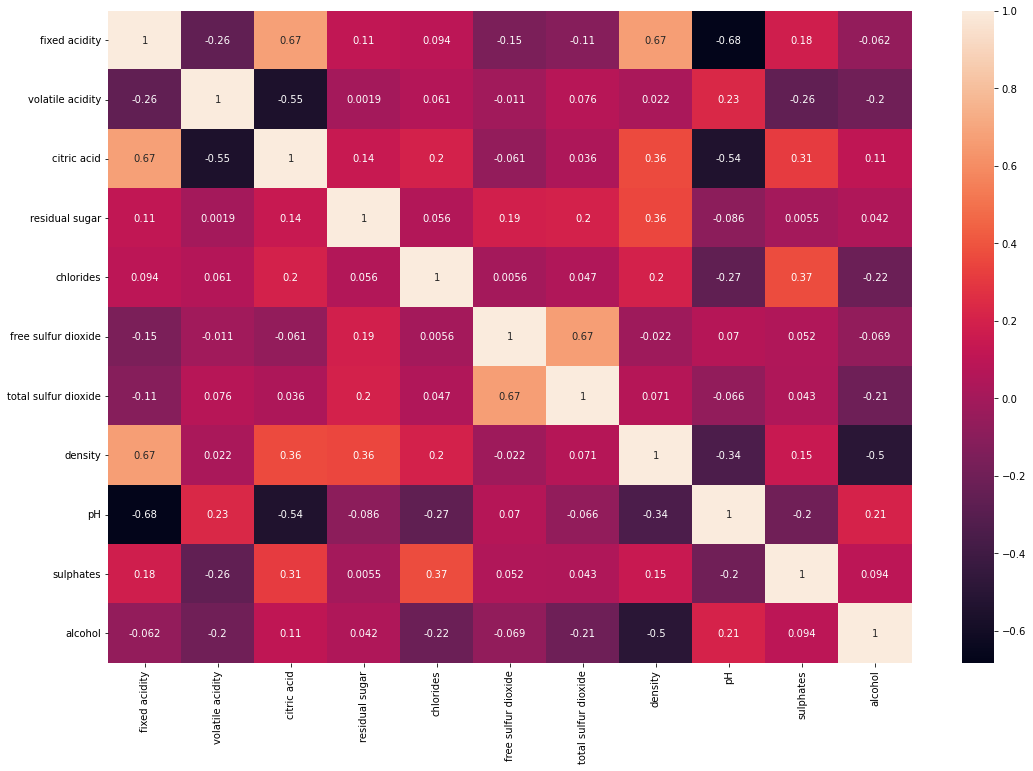

In [18]:
# Plotting heatmap to understand the correlation among the data
plt.figure(figsize=(18,12))
sns.heatmap(x.corr(), annot=True)

## Handling Imbalanced Dataset

In [19]:
# importing SMOTE from imblearn.over_sampling
from imblearn.over_sampling import SMOTE

In [20]:
# Balancing the data using SMOTE through oversampling
smote = SMOTE()
x_sm, y_sm = smote.fit_resample(x,y)

In [21]:
# We can see now the data is balanced
y_sm.value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

In [22]:
# splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2, random_state=42)

In [23]:
# importing required libraries for model building
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout

In [24]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2185,-0.571384,3.417322,-1.380485,1.028101,0.159421,-1.029747,-0.993818,-0.111762,2.010704,-0.640414,0.184714
2462,-0.841831,0.577521,-1.289872,-0.485580,-0.458564,-1.108578,-1.161171,-1.123429,0.213942,-1.400213,0.111085
2819,-0.939248,2.857041,-0.996251,-0.177501,-0.422091,0.291599,-0.449179,-0.183765,1.370640,-0.524670,0.548751
1769,-0.580848,2.625052,-1.156907,-0.179511,-0.496395,0.270529,-0.014968,0.140154,0.171952,-0.643319,-0.597531
1373,-0.356000,1.241200,-0.005010,0.894790,0.478920,1.733315,1.293361,-0.056541,-0.460762,-1.228350,-1.054113
...,...,...,...,...,...,...,...,...,...,...,...
1130,0.448342,0.403229,-1.391472,-0.453218,-0.626274,-1.039977,-1.108948,0.505273,-0.849519,-0.166115,-0.021574
1294,-0.068735,0.598756,-0.877968,-0.311323,-0.307468,0.872638,0.411500,-0.194345,-0.136798,0.542042,0.447763
860,-0.643266,0.514959,-1.083370,0.114364,-0.222453,-0.083669,1.171725,0.378070,1.288643,-0.697233,-0.866379
3507,0.460028,-0.751943,1.196940,-0.476063,-0.337006,-0.855199,-0.924432,-1.063204,-0.681498,0.279989,1.898725


In [25]:
# creating a sequence for an ANN model
model = Sequential()
model.add(tensorflow.keras.layers.Input(shape=11,))
model.add(tensorflow.keras.layers.Dense(32,activation='relu'))
model.add(tensorflow.keras.layers.Dense(64,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(128,activation='relu'))
model.add(tensorflow.keras.layers.Dense(6,activation='softmax'))

In [26]:
# LabelEncoding because categorical_crossentropy take data in one-hot encoded format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [27]:
# Converted into 0-5 but still not one-hot encoded
y_test

array([3, 2, 4, 4, 1, 1, 2, 3, 2, 3, 5, 4, 2, 0, 5, 3, 2, 2, 5, 1, 3, 0,
       2, 3, 1, 0, 3, 0, 2, 5, 2, 0, 5, 3, 0, 3, 2, 5, 2, 4, 5, 5, 3, 4,
       4, 2, 4, 2, 1, 5, 3, 3, 2, 3, 3, 0, 1, 4, 1, 3, 3, 1, 3, 0, 5, 1,
       0, 4, 4, 3, 1, 0, 2, 4, 1, 2, 1, 1, 4, 0, 5, 3, 2, 3, 3, 5, 5, 2,
       5, 1, 0, 3, 3, 2, 3, 3, 3, 4, 5, 5, 1, 5, 2, 2, 3, 1, 3, 0, 4, 4,
       3, 1, 4, 3, 2, 3, 0, 5, 1, 2, 2, 2, 3, 2, 3, 4, 2, 4, 2, 0, 4, 4,
       2, 0, 1, 0, 5, 2, 3, 0, 4, 2, 3, 3, 4, 5, 4, 3, 5, 1, 1, 2, 1, 2,
       1, 1, 0, 5, 4, 5, 1, 0, 5, 3, 4, 0, 5, 3, 1, 1, 1, 5, 1, 1, 5, 3,
       3, 0, 3, 1, 1, 2, 5, 5, 4, 4, 2, 4, 2, 4, 2, 3, 2, 4, 3, 1, 1, 0,
       1, 5, 4, 5, 0, 1, 0, 4, 1, 2, 1, 3, 5, 4, 2, 3, 5, 4, 1, 2, 4, 0,
       2, 0, 5, 5, 4, 0, 2, 0, 3, 5, 4, 1, 5, 1, 2, 3, 5, 4, 1, 1, 4, 5,
       0, 1, 3, 3, 1, 2, 3, 4, 1, 3, 3, 5, 1, 4, 2, 1, 2, 2, 1, 4, 0, 3,
       3, 0, 4, 4, 5, 0, 4, 1, 3, 3, 0, 3, 3, 3, 0, 5, 2, 5, 2, 3, 2, 2,
       0, 1, 1, 5, 5, 0, 1, 2, 4, 0, 0, 2, 4, 1, 3,

In [28]:
# Flattening the array to feed the data to input layers
y_train = pd.DataFrame(y_train.reshape(len(y_train),1))
y_test = pd.DataFrame(y_test.reshape(len(y_test),1))

In [29]:
y_train

,0
0,0
1,1
2,1
3,0
4,2
...,...
3263,3
3264,3
3265,2
3266,5


In [30]:
# Now converting the flattened array into one-hot encoded format
y_train = tensorflow.keras.utils.to_categorical(y_train,6)
y_test = tensorflow.keras.utils.to_categorical(y_test,6)

In [31]:
# Building the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
# Training the model
model.fit(x_train,y_train,epochs=400,verbose=1)

Epoch 1/400
103/103 [==============================] - 1s 2ms/step - loss: 1.4219 - accuracy: 0.4058
Epoch 2/400
103/103 [==============================] - 0s 2ms/step - loss: 1.0639 - accuracy: 0.5370
Epoch 3/400
103/103 [==============================] - 0s 2ms/step - loss: 0.9492 - accuracy: 0.6019
Epoch 4/400
103/103 [==============================] - 0s 2ms/step - loss: 0.8820 - accuracy: 0.6343
Epoch 5/400
103/103 [==============================] - 0s 2ms/step - loss: 0.8318 - accuracy: 0.6717
Epoch 6/400
103/103 [==============================] - 0s 2ms/step - loss: 0.7854 - accuracy: 0.6818
Epoch 7/400
103/103 [==============================] - 0s 2ms/step - loss: 0.7468 - accuracy: 0.7032
Epoch 8/400
103/103 [==============================] - 0s 2ms/step - loss: 0.7194 - accuracy: 0.7111
Epoch 9/400
103/103 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.7258
Epoch 10/400
103/103 [==============================] - 0s 2ms/step - loss: 0.6520 - accura

103/103 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 0.8810
Epoch 82/400
103/103 [==============================] - 0s 2ms/step - loss: 0.2860 - accuracy: 0.8810
Epoch 83/400
103/103 [==============================] - 0s 2ms/step - loss: 0.2778 - accuracy: 0.8905
Epoch 84/400
103/103 [==============================] - 0s 2ms/step - loss: 0.2797 - accuracy: 0.8874
Epoch 85/400
103/103 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.8880
Epoch 86/400
103/103 [==============================] - 0s 2ms/step - loss: 0.2772 - accuracy: 0.8862
Epoch 87/400
103/103 [==============================] - 0s 2ms/step - loss: 0.2709 - accuracy: 0.8953
Epoch 88/400
103/103 [==============================] - 0s 2ms/step - loss: 0.2723 - accuracy: 0.8944
Epoch 89/400
103/103 [==============================] - 0s 2ms/step - loss: 0.2716 - accuracy: 0.8923
Epoch 90/400
103/103 [==============================] - 0s 2ms/step - loss: 0.2707 - accuracy: 

103/103 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9229
Epoch 161/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1896 - accuracy: 0.9229
Epoch 162/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1930 - accuracy: 0.9263
Epoch 163/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9226
Epoch 164/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9296
Epoch 165/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9281
Epoch 166/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1858 - accuracy: 0.9281
Epoch 167/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9220
Epoch 168/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.9229
Epoch 169/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1857 - a

103/103 [==============================] - 0s 2ms/step - loss: 0.1474 - accuracy: 0.9480
Epoch 240/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9412
Epoch 241/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1496 - accuracy: 0.9425
Epoch 242/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1536 - accuracy: 0.9367
Epoch 243/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1451 - accuracy: 0.9412
Epoch 244/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1532 - accuracy: 0.9483
Epoch 245/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1548 - accuracy: 0.9406
Epoch 246/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1466 - accuracy: 0.9409
Epoch 247/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9367
Epoch 248/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1432 - a

103/103 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.9559
Epoch 319/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1351 - accuracy: 0.9513
Epoch 320/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1304 - accuracy: 0.9520
Epoch 321/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1420 - accuracy: 0.9455
Epoch 322/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.9510
Epoch 323/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1474 - accuracy: 0.9452
Epoch 324/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1362 - accuracy: 0.9486
Epoch 325/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1481 - accuracy: 0.9465
Epoch 326/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1308 - accuracy: 0.9489
Epoch 327/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1294 - a

103/103 [==============================] - 0s 2ms/step - loss: 0.1067 - accuracy: 0.9621
Epoch 398/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1214 - accuracy: 0.9569
Epoch 399/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1037 - accuracy: 0.9624
Epoch 400/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1167 - accuracy: 0.9584


In [33]:
y_train

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [34]:
# Predicting by rounding the value returned by softmax because metrics accepts values less than 1
y_pred = model.predict(x_test).round()

26/26 [==============================] - 0s 2ms/step


In [35]:
y_pred

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [36]:
# Finding out maximum value to get the original data
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([2, 2, 4, 4, 1, 1, 3, 2, 2, 1, 5, 4, 2, 0, 5, 2, 0, 3, 5, 1, 3, 0,
       2, 2, 1, 0, 3, 0, 3, 5, 2, 0, 5, 3, 0, 3, 2, 5, 2, 4, 5, 5, 3, 4,
       4, 1, 4, 1, 1, 5, 3, 3, 2, 3, 3, 0, 1, 4, 1, 3, 2, 1, 3, 0, 5, 1,
       0, 4, 4, 3, 1, 0, 2, 4, 1, 2, 1, 1, 4, 0, 5, 3, 3, 5, 2, 5, 5, 2,
       5, 1, 0, 3, 0, 2, 1, 3, 3, 4, 5, 5, 1, 5, 2, 2, 3, 1, 2, 0, 4, 4,
       3, 1, 4, 1, 2, 4, 0, 5, 1, 2, 2, 3, 3, 2, 3, 4, 2, 4, 2, 0, 4, 4,
       2, 0, 1, 0, 5, 3, 2, 0, 4, 2, 1, 3, 4, 5, 4, 3, 5, 1, 1, 2, 1, 2,
       1, 1, 0, 5, 4, 5, 1, 0, 5, 3, 4, 0, 5, 3, 1, 1, 1, 5, 1, 1, 5, 4,
       1, 0, 3, 1, 1, 3, 5, 5, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 2, 1, 1, 0,
       1, 5, 4, 5, 0, 1, 0, 4, 1, 2, 2, 3, 5, 4, 3, 2, 5, 4, 1, 3, 4, 0,
       2, 0, 5, 5, 4, 0, 2, 0, 3, 5, 4, 1, 5, 1, 3, 3, 5, 4, 1, 1, 4, 5,
       0, 1, 2, 3, 1, 3, 3, 4, 1, 3, 3, 5, 1, 4, 2, 1, 2, 2, 1, 4, 0, 4,
       3, 0, 4, 4, 5, 0, 4, 1, 3, 4, 0, 3, 3, 4, 0, 5, 2, 5, 1, 4, 2, 2,
       0, 1, 1, 5, 5, 0, 1, 2, 4, 0, 0, 2, 4, 1, 2,

In [37]:
y_test

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [38]:
# Finding out maximum value to get the original data
y_test = np.argmax(y_test,axis=1)
y_test

array([3, 2, 4, 4, 1, 1, 2, 3, 2, 3, 5, 4, 2, 0, 5, 3, 2, 2, 5, 1, 3, 0,
       2, 3, 1, 0, 3, 0, 2, 5, 2, 0, 5, 3, 0, 3, 2, 5, 2, 4, 5, 5, 3, 4,
       4, 2, 4, 2, 1, 5, 3, 3, 2, 3, 3, 0, 1, 4, 1, 3, 3, 1, 3, 0, 5, 1,
       0, 4, 4, 3, 1, 0, 2, 4, 1, 2, 1, 1, 4, 0, 5, 3, 2, 3, 3, 5, 5, 2,
       5, 1, 0, 3, 3, 2, 3, 3, 3, 4, 5, 5, 1, 5, 2, 2, 3, 1, 3, 0, 4, 4,
       3, 1, 4, 3, 2, 3, 0, 5, 1, 2, 2, 2, 3, 2, 3, 4, 2, 4, 2, 0, 4, 4,
       2, 0, 1, 0, 5, 2, 3, 0, 4, 2, 3, 3, 4, 5, 4, 3, 5, 1, 1, 2, 1, 2,
       1, 1, 0, 5, 4, 5, 1, 0, 5, 3, 4, 0, 5, 3, 1, 1, 1, 5, 1, 1, 5, 3,
       3, 0, 3, 1, 1, 2, 5, 5, 4, 4, 2, 4, 2, 4, 2, 3, 2, 4, 3, 1, 1, 0,
       1, 5, 4, 5, 0, 1, 0, 4, 1, 2, 1, 3, 5, 4, 2, 3, 5, 4, 1, 2, 4, 0,
       2, 0, 5, 5, 4, 0, 2, 0, 3, 5, 4, 1, 5, 1, 2, 3, 5, 4, 1, 1, 4, 5,
       0, 1, 3, 3, 1, 2, 3, 4, 1, 3, 3, 5, 1, 4, 2, 1, 2, 2, 1, 4, 0, 3,
       3, 0, 4, 4, 5, 0, 4, 1, 3, 3, 0, 3, 3, 3, 0, 5, 2, 5, 2, 3, 2, 2,
       0, 1, 1, 5, 5, 0, 1, 2, 4, 0, 0, 2, 4, 1, 3,

In [39]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

87.28606356968214

In [40]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       142
           1       0.99      0.90      0.94       145
           2       0.73      0.75      0.74       145
           3       0.61      0.79      0.69       120
           4       0.98      0.89      0.93       128
           5       1.00      0.97      0.99       138

    accuracy                           0.87       818
   macro avg       0.89      0.87      0.88       818
weighted avg       0.89      0.87      0.88       818

